In [22]:
import sys
sys.path.append('..')
%load_ext autoreload
%autoreload 2
from targets import DensityEstimationTarget
from models import NDRE
import torch
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


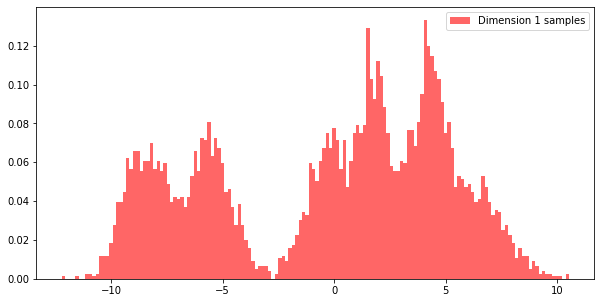

In [23]:
example =  "Dimension 1"
num_samples = 50000
target =DensityEstimationTarget(example, num_samples)
target.target_visual()
target_samples = target.get_samples()

In [24]:
import numpy as np
from matplotlib.colors import ListedColormap
N = 256
orange = np.ones((N, 4))
orange[:, 0] = np.geomspace(255 / 256, 1, N)  # R = 255
orange[:, 1] = np.geomspace(165 / 256, 1, N)  # G = 165
orange[:, 2] = np.geomspace(0.001 / 256, 1, N)  # B = 0
orange_cmap = ListedColormap(orange[::-1])

orange_color = "#FFA500"

red = np.ones((N, 4))
red[:, 0] = np.geomspace(255 / 256, 1, N)  # R = 255
red[:, 1] = np.geomspace(0.001 / 256, 1, N)  # G = 0
red[:, 2] = np.geomspace(0.001 / 256, 1, N)  # B = 0
red_cmap = ListedColormap(red[::-1])

red_color = "#FF0000"

blue = np.ones((N, 4))
blue[:, 0] = np.geomspace(0.001 / 256, 1, N)  # R = 0
blue[:, 1] = np.geomspace(0.001 / 256, 1, N)  # G = 0
blue[:, 2] = np.geomspace(255 / 256, 1, N)  # B = 255
blue_cmap = ListedColormap(blue[::-1])

blue_color = "#0000FF"

green = np.ones((N, 4))
green[:, 0] = np.geomspace(0.001 / 256, 1, N)  # R = 0
green[:, 1] = np.geomspace(128 / 256, 1, N)  # G = 128
green[:, 2] = np.geomspace(0.001 / 256, 1, N)  # B = 128
green_cmap = ListedColormap(green[::-1])

green_color = "#008000"

pink = np.ones((N, 4))
pink[:, 0] = np.geomspace(255 / 256, 1, N)  # R = 255
pink[:, 1] = np.geomspace(0.001 / 256, 1, N)  # G = 0
pink[:, 2] = np.geomspace(211 / 256, 1, N)  # B = 211
pink_cmap = ListedColormap(pink[::-1])

pink_color = "#FF00D3"

purple = np.ones((N, 4))
purple[:, 0] = np.geomspace(51 / 256, 1, N)  # R = 102
purple[:, 1] = np.geomspace(0.001 / 256, 1, N)  # G = 0
purple[:, 2] = np.geomspace(51 / 256, 1, N)  # B = 102
purple_cmap = ListedColormap(purple[::-1])

purple_color = "#660066"

In [25]:
epochs = 50
batch_size = 5000
hidden_dims = [64,64,64]
ndre = NDRE(target_samples,hidden_dims)
ndre.train(epochs, batch_size)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:40<00:00,  1.23it/s, loss = 1.24752]


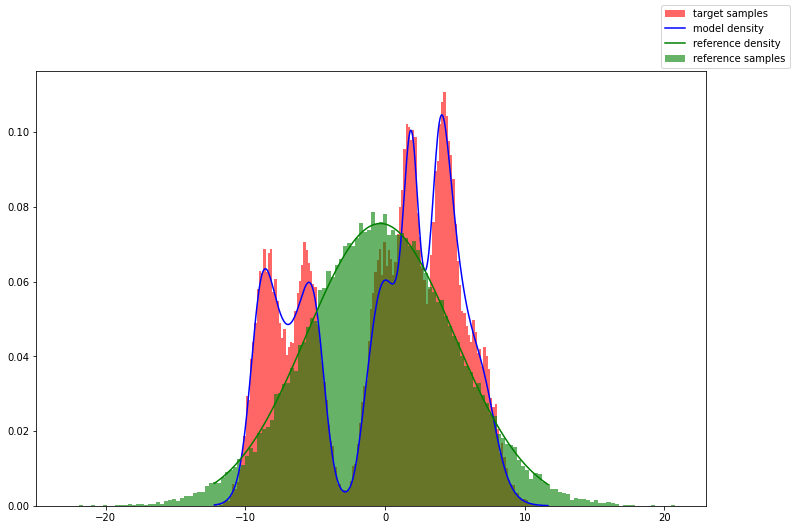

In [27]:
###Visualize NDRE dimension 1###

model_to_visualize = ndre
with torch.no_grad():
    tt = torch.linspace(torch.min(model_to_visualize.target_samples), torch.max(model_to_visualize.target_samples), 400).unsqueeze(-1)
    fig = plt.figure(figsize=(12, 8))
    plt.hist(model_to_visualize.target_samples.squeeze(-1).numpy(), density=True, bins=150, color=red_color, label='target samples',alpha=.6)
    plt.plot(tt, torch.exp(model_to_visualize.log_density(tt)).numpy(), color=blue_color, label='model density')
    plt.plot(tt, torch.exp(model_to_visualize.reference.log_prob(tt)).numpy(), color=green_color,label='reference density')
    plt.hist(model_to_visualize.reference.sample([model_to_visualize.target_samples.shape[0]]).squeeze(-1).numpy(), density=True, bins=150, color=green_color,label='reference samples', alpha=.6)
    fig.legend()

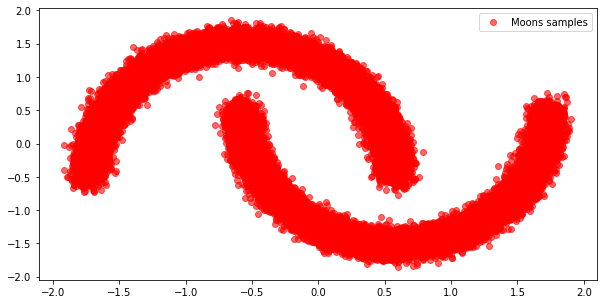

In [28]:
example =  "Moons"
num_samples = 50000
target =DensityEstimationTarget(example, num_samples)
target.target_visual()
target_samples = target.get_samples()

In [29]:
epochs = 50
batch_size = 5000
hidden_dims = [64,64,64]
ndre = NDRE(target_samples,hidden_dims)
ndre.train(epochs, batch_size)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:41<00:00,  1.21it/s, loss = 0.628718]


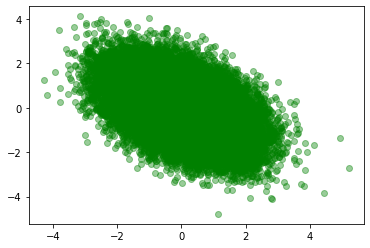

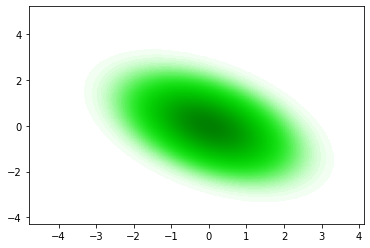

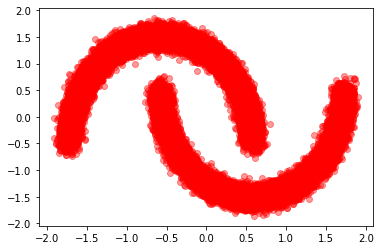

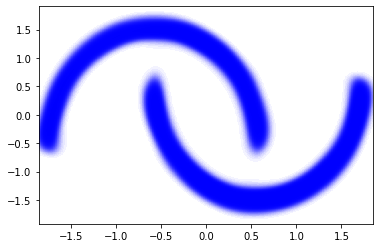

In [33]:
### Visualize NDRE dimension 2###

model_to_visualize = ndre
with torch.no_grad():
    plt.figure()
    proxy_samples = model_to_visualize.reference.sample([model_to_visualize.target_samples.shape[0]])
    plt.scatter(proxy_samples[:, 0], proxy_samples[:, 1], color=green_color, alpha = .4)
    plt.figure()
    tt_0 = torch.linspace(torch.min(proxy_samples[:, 0]), torch.max(proxy_samples[:, 0]), 500)
    tt_1 = torch.linspace(torch.min(proxy_samples[:, 1]), torch.max(proxy_samples[:, 1]), 500)
    grid = torch.cartesian_prod(tt_1, tt_0)
    density = torch.exp(model_to_visualize.reference.log_prob(grid)).reshape(500, 500).T
    plt.pcolormesh(tt_1, tt_0, density.numpy(), cmap=green_cmap)
    plt.figure()
    plt.scatter(model_to_visualize.target_samples[:, 0], model_to_visualize.target_samples[:, 1], color=red_color, alpha = .4)
    plt.figure()
    tt_0 = torch.linspace(torch.min(model_to_visualize.target_samples[:, 0]), torch.max(model_to_visualize.target_samples[:, 0]), 500)
    tt_1 = torch.linspace(torch.min(model_to_visualize.target_samples[:, 1]), torch.max(model_to_visualize.target_samples[:, 1]), 500)
    grid = torch.cartesian_prod(tt_1, tt_0)
    density = torch.exp(model_to_visualize.log_density(grid)).reshape(500, 500).T
    plt.pcolormesh(tt_1, tt_0, density.detach().numpy(), cmap=blue_cmap)

In [38]:
from targets import ConditionalDensityEstimationTarget
from models import CNDRE

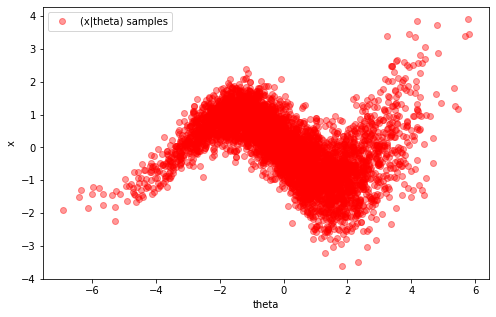

In [39]:
example =  "Gaussian Field"
num_samples = 50000
target = ConditionalDensityEstimationTarget(example, num_samples)
x_samples , theta_samples, theta_prior, simulator = target.get_simulator()
target.target_visual()

In [45]:
epochs = 50
batch_size = 5000
cndre= CNDRE(x_samples, theta_samples,hidden_dims = [64,64,64], mode = 'Proxy')
cndre.train(epochs,batch_size)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:58<00:00,  1.17s/it, loss = 1.120366]


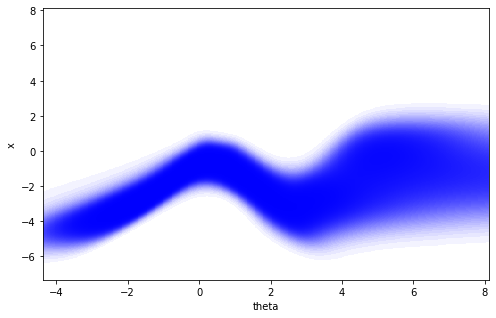

In [47]:
### Visualization p=d=1 -- Proxy mode ###

model_to_visualize = cndre
with torch.no_grad():
    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot()
    ax.set_xlabel('theta')
    ax.set_ylabel('x')
    delta = 500
    x_tt = torch.linspace(torch.min(model_to_visualize.x_samples), torch.max(model_to_visualize.theta_samples), delta)
    theta_tt = torch.linspace(torch.min(model_to_visualize.theta_samples), torch.max(model_to_visualize.theta_samples), delta)
    ax.pcolormesh(x_tt,theta_tt,torch.exp(model_to_visualize.log_density(x_tt.unsqueeze(-1).unsqueeze(1).repeat(1, delta, 1), theta_tt.unsqueeze(-1).unsqueeze(0).repeat(delta, 1, 1))).numpy(), cmap = blue_cmap)

In [48]:
epochs = 50
batch_size = 5000
cndre= CNDRE(x_samples, theta_samples,hidden_dims = [64,64,64], mode = 'Ratio')
cndre.train(epochs,batch_size)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:59<00:00,  1.19s/it, loss = 1.132047]


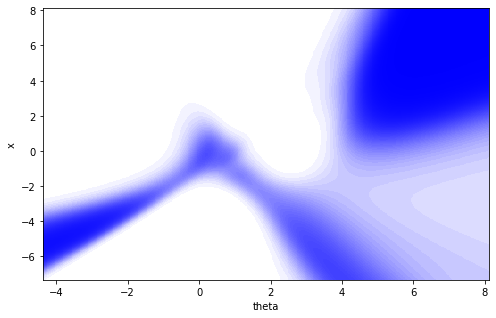

In [52]:
### Visualization p=d=1 -- Proxy mode ###

model_to_visualize = cndre
with torch.no_grad():
    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot()
    ax.set_xlabel('theta')
    ax.set_ylabel('x')
    delta = 500
    x_tt = torch.linspace(torch.min(model_to_visualize.x_samples), torch.max(model_to_visualize.theta_samples), delta)
    theta_tt = torch.linspace(torch.min(model_to_visualize.theta_samples), torch.max(model_to_visualize.theta_samples), delta)
    ax.pcolormesh(x_tt,theta_tt,torch.exp(model_to_visualize.log_ratio(x_tt.unsqueeze(-1).unsqueeze(1).repeat(1, delta, 1), theta_tt.unsqueeze(-1).unsqueeze(0).repeat(delta, 1, 1))).numpy(), cmap = blue_cmap)

In [ ]:
example =  "Gaussian Field"
num_samples = 50000
target = ConditionalDensityEstimationTarget(example, num_samples)
x_samples , theta_samples, theta_prior, simulator = target.get_simulator()
target.target_visual()